In [402]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import random
from sklearn.cross_validation import train_test_split


import xgboost as xgb
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.cross_validation import train_test_split
import math

from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

In [403]:
def submit_(Approved_):
    ID= pd.DataFrame()
    ID= test.ID

    sample_submission = pd.DataFrame({
            "ID": ID,
            "Approved": Approved_ 
        })
    sample_submission.sort_values('ID')
    sample_submission.to_csv('sample_submission1.csv', index=False)

In [404]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
sample= pd.read_csv("sample.csv")

In [405]:
train.Lead_Creation_Date= pd.to_datetime(train.Lead_Creation_Date)
train['Lead_day']= train.Lead_Creation_Date.dt.month

test.Lead_Creation_Date= pd.to_datetime(test.Lead_Creation_Date)
test['Lead_day']= test.Lead_Creation_Date.dt.month

In [406]:
train.DOB= pd.to_datetime(train.DOB)
train.DOB= train.DOB.dt.year


test.DOB= pd.to_datetime(test.DOB)
test.DOB= test.DOB.dt.year

train.DOB= 2017- train.DOB
test.DOB= 2017- test.DOB

train.loc[train.DOB<0, 'DOB'] = train[train.DOB<0]['DOB'].apply(lambda x: x+100)
test.loc[test.DOB<0, 'DOB'] = test[test.DOB<0]['DOB'].apply(lambda x: x+100)

data_age=pd.concat([train, test])
data_age['DOB']= pd.cut(data_age['DOB'], bins= 20)
train.DOB= data_age.DOB[:train.shape[0]]
test.DOB= data_age.DOB[test.shape[0]:]

train.dropna(subset=['DOB'], inplace=True)

In [407]:
data_loc=pd.concat([train, test])

rep= 'City_Code'
data_loc.loc[data_loc[rep].isin((data_loc[rep].value_counts()[data_loc[rep].value_counts()<150].index)), rep]= 'others'
train[rep]= data_loc[rep][:train.shape[0]]
test[rep]= data_loc[rep][test.shape[0]:]

rep= 'Employer_Code'

data_loc.loc[data_loc[rep].isin((data_loc[rep].value_counts()[data_loc[rep].value_counts()<3].index)), rep]= 'others'
train[rep]= data_loc[rep][:train.shape[0]]
test[rep]= data_loc[rep][test.shape[0]:]

rep= 'Source'

data_loc.loc[data_loc[rep].isin((data_loc[rep].value_counts()[data_loc[rep].value_counts()<4].index)), rep]= 'others'
train[rep]= data_loc[rep][:train.shape[0]]
test[rep]= data_loc[rep][test.shape[0]:]

skewed = ['Monthly_Income', 'EMI', 'Loan_Amount', 'Interest_Rate']

def normalizing(X):

    data_loc[X][data_loc[X] < 0]=0
    data_loc[X][data_loc[X] > data_loc[X].quantile(0.999)] = data_loc[X].quantile(0.999)
    data_loc[X] = data_loc[X].apply(lambda x: x+np.random.rand())
    
    data_loc[X] = data_loc[X].apply(lambda x: x+1)
    data_loc[~data_loc[i].isnull()][X], _ = boxcox(data_loc[~data_loc[i].isnull()][X])

for i in skewed:
    normalizing(i)
    train[i]= data_loc[i][:train.shape[0]]
    test[i]= data_loc[i][test.shape[0]:]


In [408]:
train.drop(train.index[train.Loan_Period==6], inplace=True)
test[test.Loan_Period==6]['Loan_Period']='NaN'

# train.loc[train['Existing_EMI']==0, 'Existing_EMI']  = 'NaN'
# test.loc[test['Existing_EMI']==0, 'Existing_EMI'] = 'NaN'

In [409]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

label_= [ 'Gender','City_Code','City_Category', 'Employer_Code', 'Employer_Category1',
        'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type',
        'Contacted', 'Source', 'Source_Category']

train['DOB'] = le.fit_transform(train['DOB'])
test['DOB'] = le.fit_transform(test['DOB'])
    
for labe_ in label_:
    train[labe_][pd.isnull(train[labe_])]  = 'NaN'
    test[labe_][pd.isnull(test[labe_])]  = 'NaN'
    train[labe_] = le.fit_transform(train[labe_])
    test[labe_] = le.fit_transform(test[labe_])

In [410]:
train.columns.values

array(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type',
       'Contacted', 'Source', 'Source_Category', 'Existing_EMI',
       'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI', 'Var1',
       'Approved', 'Lead_day'], dtype=object)

In [411]:
var= [ 'Gender', 'DOB', 'Lead_day', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type',
       'Contacted', 'Source', 'Source_Category', 'Existing_EMI',
       'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI', 'Var1']

y = train['Approved']
data = train[var]
sub_test = test[var]

In [412]:
train.columns.difference(var)

Index(['Approved', 'ID', 'Lead_Creation_Date'], dtype='object')

In [423]:
# def evalerror(preds, dtrain):
#     labels = dtrain.get_label()
#     return 'roc_auc', roc_auc_score(labels, preds)#math.sqrt(mean_squared_error(labels, preds))

# # split data to training and validation sets
# X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.01, random_state=1, stratify=y)
# # convert data to Dmatrix format for xgboost
# d_train = xgb.DMatrix(X_train, label=y_train)
# d_valid = xgb.DMatrix(X_test, label=y_test)
# d_test = xgb.DMatrix(sub_test)

# params = {  
#     "n_estimators":  200,        #230  #
#     "max_depth": 4 ,            #4        #       
#     "learning_rate": 0.012 ,    #.012  #
#     "colsample_bytree": 1 ,     #1    #
#     "subsample": .9 ,            #.9          #
#     "gamma": .05 ,               #.1
#     'reg_alpha': .1 ,           #.1
#     "min_child_weight": 4 ,       #4
# }

# watchlist = [(d_train, 'train'), (d_valid, 'valid')]

# # Train xgboost
# xgb0 = xgb.train(params, d_train, 1000, watchlist,  feval = evalerror, maximize=False, verbose_eval=10, early_stopping_rounds=300)
# # Predict from xgboost regressor
# Approved_ = xgb0.predict(d_test)

[0]	train-roc_auc:0.820163	valid-roc_auc:0.83064
Multiple eval metrics have been passed: 'valid-roc_auc' will be used for early stopping.

Will train until valid-roc_auc hasn't improved in 300 rounds.
[10]	train-roc_auc:0.836319	valid-roc_auc:0.830713
[20]	train-roc_auc:0.838928	valid-roc_auc:0.827147
[30]	train-roc_auc:0.843288	valid-roc_auc:0.827511
[40]	train-roc_auc:0.845682	valid-roc_auc:0.822489
[50]	train-roc_auc:0.848286	valid-roc_auc:0.825328
[60]	train-roc_auc:0.850609	valid-roc_auc:0.823071
[70]	train-roc_auc:0.853769	valid-roc_auc:0.822198
[80]	train-roc_auc:0.856138	valid-roc_auc:0.821834
[90]	train-roc_auc:0.858104	valid-roc_auc:0.822635
[100]	train-roc_auc:0.860164	valid-roc_auc:0.823654
[110]	train-roc_auc:0.862126	valid-roc_auc:0.824527
[120]	train-roc_auc:0.864019	valid-roc_auc:0.822052
[130]	train-roc_auc:0.865902	valid-roc_auc:0.822416
[140]	train-roc_auc:0.867337	valid-roc_auc:0.822052
[150]	train-roc_auc:0.868832	valid-roc_auc:0.822489
[160]	train-roc_auc:0.870433

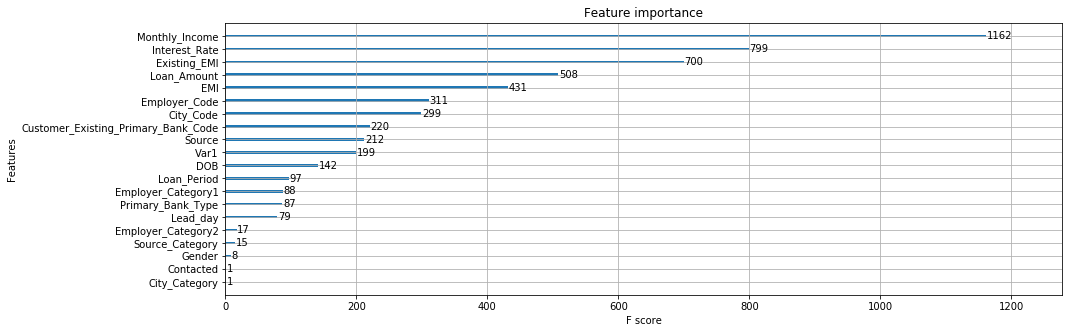

In [421]:
# ax = xgb.plot_importance(reg)
# fig = ax.figure
# fig.set_size_inches(15,5)

In [439]:
# d_train = xgb.DMatrix(data, label=y)
# d_test = xgb.DMatrix(sub_test)
# xgb0 = xgb.train(params, d_train, 400)
# # Predict from xgboost regressor
# Approved_ = xgb0.predict(d_test)

In [440]:
# submit_(Approved_)

In [ ]:
# params = {}
# params['max_bin'] = 10
# params['max_depth'] = -1
# params['learning_rate'] = 0.01 # shrinkage_rate
# params['boosting_type'] = 'gbdt'
# params['objective'] = 'binary'
# params['metric'] = 'auc'          # or 'mae'
# params['is_unbalance'] = True
# params['sub_feature'] = 0.8      # feature_fraction 
# params['bagging_fraction'] = 0.6 # sub_row
# params['bagging_freq'] = 70
# params['num_leaves'] = 200        # num_leaf
# params['min_data'] = 500         # min_data_in_leaf
# params['min_hessian'] = .05     # min_sum_hessian_in_leaf

In [480]:
import lightgbm
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'roc_auc', roc_auc_score( labels, preds), 
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.01, random_state=1, stratify=y)

d_train = lightgbm.Dataset(X_train, label=y_train)
d_valid = lightgbm.Dataset(X_test, label=y_test)

params = {}
params['max_bin'] = 10
params['max_depth'] = -1
params['learning_rate'] = 0.01 # shrinkage_rate
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'auc'          # or 'mae'
params['is_unbalance'] = True
params['sub_feature'] = 0.8      # feature_fraction 
params['bagging_fraction'] = 0.6 # sub_row
params['bagging_freq'] = 70
params['num_leaves'] = 50        # num_leaf
params['min_data'] = 500         # min_data_in_leaf
params['min_hessian'] = .05     # min_sum_hessian_in_leaf


lgb0 = lightgbm.train(params,
                d_train,
                num_boost_round=1000,
                valid_sets=[d_valid, d_train],
                feval= evalerror,
                verbose_eval= 10,
                early_stopping_rounds= 100)
Approved_ = lgb0.predict(sub_test)

Training until validation scores don't improve for 100 rounds.
[10]	training's auc: 0.857027	training's roc_auc: 0.857027	valid_0's auc: 0.791557	valid_0's roc_auc: 0.791557
[20]	training's auc: 0.863061	training's roc_auc: 0.863061	valid_0's auc: 0.802329	valid_0's roc_auc: 0.802329
[30]	training's auc: 0.865068	training's roc_auc: 0.865068	valid_0's auc: 0.81441	valid_0's roc_auc: 0.81441
[40]	training's auc: 0.867545	training's roc_auc: 0.867545	valid_0's auc: 0.815138	valid_0's roc_auc: 0.815138
[50]	training's auc: 0.869642	training's roc_auc: 0.869642	valid_0's auc: 0.818632	valid_0's roc_auc: 0.818632
[60]	training's auc: 0.870607	training's roc_auc: 0.870607	valid_0's auc: 0.821252	valid_0's roc_auc: 0.821252
[70]	training's auc: 0.872449	training's roc_auc: 0.872449	valid_0's auc: 0.822707	valid_0's roc_auc: 0.822707
[80]	training's auc: 0.875553	training's roc_auc: 0.875553	valid_0's auc: 0.824454	valid_0's roc_auc: 0.824454
[90]	training's auc: 0.87772	training's roc_auc: 0.

In [481]:
d_train = lightgbm.Dataset(X_train, label=y_train)
d_valid = lightgbm.Dataset(X_test, label=y_test)
lgb0 = lightgbm.train(params,
                d_train,
                num_boost_round=400)
# Predict from xgboost regressor
Approved_ = lgb0.predict(sub_test)

In [482]:
submit_(Approved_)

In [444]:
# from lightgbm import LGBMClassifier
# lgb1= LGBMClassifier()
# print (lgb1.fit(data, y))

In [445]:
# import xgboost as xgb
# xgb1= xgb.XGBClassifier()
# print (xgb1.fit(data, y))

In [446]:
# from sklearn.linear_model import LogisticRegression, LinearRegression
# lr= LogisticRegression()
# var= data.isnull().sum()[data.isnull().sum()==0].index
# print (lr.fit(train[var], y))

In [452]:
# xgb0.predict(d_test)

array([ 0.01354998,  0.03694087,  0.00598866, ...,  0.00509855,
        0.02184999,  0.0091722 ], dtype=float32)

In [454]:
# Approved_train_xgb0= xgb0.predict(xgb.DMatrix(data))
# Approved_test_xgb0= xgb0.predict(xgb.DMatrix(sub_test))

# Approved_train_lgb0= lgb0.predict(data)
# Approved_test_lgb0= lgb0.predict(sub_test)

# ensemble_train= pd.DataFrame({'LGB': Approved_train_lgb,
#                             'XGB': Approved_train_xgb0})

# ensemble_test= pd.DataFrame({'LGB': Approved_test_lgb,
#                             'XGB': Approved_test_xgb0})

In [455]:
# lr_ensemble= LogisticRegression()
# lr_ensemble.fit(ensemble_train, y)
# Approved_= lr_ensemble.predict_proba(ensemble_test)[:,1]

In [457]:
# lin_ensemble= LinearRegression()
# print (lin_ensemble.fit(ensemble_train,y))
# Approved_= lin_ensemble.predict(ensemble_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [458]:
# submit_(Approved_)